In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def tri_3pl_enem(theta, a, b, c):
    return c + (1 - c) * (1 / (1 + np.exp(-1.7 * a * (theta - b))))

In [3]:
def plot_graphic(a, b, c):
    theta_vals = np.linspace(-4, 4, num=100)
    y_vals = [tri_3pl_enem(x, a, b, c) for x in theta_vals]
    plt.plot(theta_vals, y_vals)
    plt.xlabel("Valores de theta")
    plt.ylabel("Probabilidade de resposta correta")
    plt.title("Modelo logístico de três parâmetros (TRI)")
    plt.axhline(y=0.65, xmin=-4)
    plt.show()

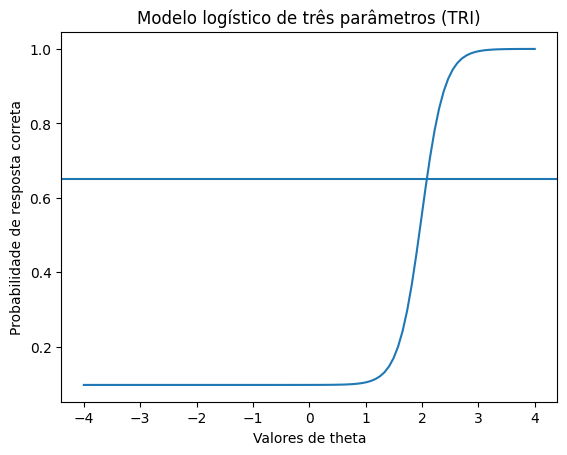

In [4]:
plot_graphic(2.898, 1.992, 0.097)

In [5]:
def find_theta(a, b, c, targ):
    left = -100
    right = 100
    tol = 1e-5
    target = targ
    while (right - left) / 2 > tol:
        theta = (left + right) / 2
        value = tri_3pl_enem(theta, a, b, c)
        if value > target:
            right = theta
        else:
            left = theta
    return theta * 100 + 500

In [6]:
# Cálculos de TRI na Prova

In [7]:
dItens2019 = pd.read_csv("ITENS_PROVA_2019.csv", sep=";", encoding="latin-1")

In [8]:
provas = [512, 552, 508, 548, 505, 544, 518, 556]
dItens2019 = dItens2019[dItens2019.CO_PROVA.isin(provas)]

In [9]:
dItens2019["theta_065"] = 0
dItens2019["theta_080"] = 0
dItens2019["theta_099"] = 0

In [10]:
for i in dItens2019.index:
    dItens2019.loc[i, "theta_065"] = find_theta(
        dItens2019.loc[i, "NU_PARAM_A"],
        dItens2019.loc[i, "NU_PARAM_B"],
        dItens2019.loc[i, "NU_PARAM_C"],
        0.65,
    )
    dItens2019.loc[i, "theta_080"] = find_theta(
        dItens2019.loc[i, "NU_PARAM_A"],
        dItens2019.loc[i, "NU_PARAM_B"],
        dItens2019.loc[i, "NU_PARAM_C"],
        0.80,
    )
    dItens2019.loc[i, "theta_099"] = find_theta(
        dItens2019.loc[i, "NU_PARAM_A"],
        dItens2019.loc[i, "NU_PARAM_B"],
        dItens2019.loc[i, "NU_PARAM_C"],
        0.99,
    )